<a href="https://colab.research.google.com/github/KPxto/analise_covid/blob/main/analise_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>COVID NO ESTADO DA BAHIA</center> 
>**Autor: Kaio Peixoto**

- [Linkedin](https://www.linkedin.com/in/kaiopeixoto/)
- [Github](https://github.com/KPxto)

<br>

Este notebook analisa os dados da COVID-19 disponibilizados pelo portal Brasil.io através deste [link](https://brasil.io/dataset/covid19/caso/). 
<br>

Os dados são apresentados diariamente pelas secretarias estaduais e municipais de saúde e coletados/compilados pela equipe de voluntarios do Brasil.io. Aqui foram analisados os dados desde o começo da pandemia até a primeira quinzena de Dezembro.
<br>

Este estudo visa analisar especificamente a situação do estado da Bahia e suas microrregiões, ou, regiões intermediárias e imediatas. Segundo o IBGE, as microrregiões **"são agrupamentos de regiões imediatas que são articuladas através da influência de uma metrópole, capital regional ou centro urbano representativo dentro do conjunto"**. Por determinação da nova nomenclatura do IBGE, chamaremos estas áreas de regiões intermediárias e imediatas.

Dentro de um mesmo estado podem existir realidades bem distintas entre as subdivisões. Para um estado de grandes proporções como a Bahia pode ser mais interessante analisarmos cada região dessa para que o governo estadual possa alocar recursos onde mais se precisa, atuando efetivamente contra os efeitos da pandemia.
<br>

O IBGE dividiu a Bahia em 32 regiões intermediárias e imediatas e nosso estudo vai se basear fazendo um comparativo entre as mesmas.

No entanto, antes de dar um zoom em cada subdivisão da Bahia, vamos contextulizar a situação nacional fazendo os seguintes comparativos: 

    1. entre as 5 regiões do Brasil;
    2. entre os estados do Nordeste;
    
Os indicadores comparados serão:

    1. confirmados por 100 mil;
    2. óbitos por 100 mil;
    3. taxa de mortalidade; 

A divisão por 100 mil habitantes facilita um comparativo mais justo respeitando as devidas proporcionalidades.

Ou seja, faremos um zoom de forma gradual começando no cenário nacional até chegar nas regiões intermediárias e imediatas da Bahia.

## Resumo:

Tentaremos responder às perguntas abaixo. Clique no link de cada zoom para ir direto para a análise:

- [Zoom 1](#regioes_brasil): vamos comparar a região NE com outras regiões do Brasil. 
    - Qual região teve mais casos confirmados por 100 mil habitantes? 
    - E quantos óbitos?
    - Qual a taxa de mortalidade por região?
    
    <br>
    
- [Zoom 2](#ne): comparação dos números da Bahia com os dos outros estados do NE.
    - Dentre os 9 estados, como a Bahia se posiciona no número de casos confirmados?
    - Em quais estados existem números mais preocupantes nos óbitos?
    - Como a pandemia evoluiu no estado da Bahia e em outros onde a situação foi mais crítica?
    - Qual o estado melhor posicionado na prevenção da pandemia?
    
    <br>
    
- [Zoom 3](#bahia): Covid no estado da Bahia.
    - Qual a média móvel de casos confirmados e mortes desde o início da pandemia no estado da Bahia?
    - Será que o pior já passou ou existe uma segunda onda vindo aí?
    - Como a pandemia tem se comportado dentre as diferentes regiões intermediárias da Bahia?
    - Quantos confirmados a cada 100 mil e qual a mortalidade da doença?
    - Os maiores picos da doença ocorreram na mesma época em todas regiões ou em momentos diferentes?
    - Qual região está mais preparada e menos preparada para uma possível segunda onda da doença?
    - Onde estão as cidades em que a doença foi mais controlada?
    
[Conclusões](#conclusao)

<a id='section'></a>
## Cidades e suas regiões intermediárias imediatas

De início, vamos logo organizar as subdivisões da Bahia em listas com suas respectivas cidades.

In [52]:
# foram copiadas do wikipedia as informações de cada cidade e sua respectiva região intermediárias
# para transformar as cidades numa lista, aplicamos o metodo split
# o nome da lista corresponde ao nome do principal pólo regional

b='''Baianópolis
Barreiras
Catolândia
Formosa do Rio Preto
Luís Eduardo Magalhães
Riachão das Neves
São Desidério'''

barreiras = b.split('\n')

c='''Angical
Brejolândia
Cotegipe
Cristópolis
Mansidão
Santa Rita de Cássia
Tabocas do Brejo Velho
Wanderley'''

cotegipe = c.split('\n')

smv='''Canápolis
Cocos
Coribe
Correntina
Jaborandi
Santa Maria da Vitória
Santana
São Félix do Coribe
Serra Dourada'''

sta_maria_vit = smv.split('\n')

j='''Campo Alegre de Lourdes
Casa Nova
Curaçá
Juazeiro
Pilão Arcado
Remanso
Sento Sé
Sobradinho'''

juazeiro = j.split('\n')

pa='''Abaré
Chorrochó
Glória
Macururé
Paulo Afonso
Rodelas'''

paulo_afonso = pa.split('\n')

barra='''Barra
Buritirama
Ibotirama
Itaguaçu da Bahia
Morpará
Muquém do São Francisco
Xique-Xique'''

barra = barra.split('\n')

bj='''Bom Jesus da Lapa
Carinhanha
Feira da Mata
Paratinga
Serra do Ramalho
Sítio do Mato'''

bom_jesus_lapa = bj.split('\n')

sdb='''Andorinha
Antônio Gonçalves
Campo Formoso
Filadélfia
Itiúba
Jaguarari
Pindobaçu
Senhor do Bonfim
Umburanas'''

senhor_bonfim = sdb.split('\n')

ir='''América Dourada
Barra do Mendes
Barro Alto
Cafarnaum
Canarana
Central
Gentio do Ouro
Ibipeba
Ibititá
Iraquara
Irecê
João Dourado
Jussara
Lapão
Mulungu do Morro
Presidente Dutra
São Gabriel
Souto Soares
Uibaí'''

irece = ir.split('\n')

jac='''Caém
Caldeirão Grande
Capim Grosso
Jacobina
Miguel Calmon
Mirangaba
Morro do Chapéu
Ourolândia
Piritiba
Ponto Novo
Quixabeira
São José do Jacuípe
Saúde
Serrolândia
Várzea do Poço
Várzea Nova'''

jacobina = jac.split('\n')

itab='''Baixa Grande
Boa Vista do Tupim
Iaçu
Ibiquera
Itaberaba
Lajedinho
Macajuba
Mairi
Mundo Novo
Ruy Barbosa
Tapiramutá
Várzea da Roça'''

itaberada = itab.split('\n')

fs='''Água Fria
Anguera
Antônio Cardoso
Conceição da Feira
Conceição do Jacuípe
Coração de Maria
Elísio Medrado
Feira de Santana
Ipecaetá
Ipirá
Irará
Itatim
Ouriçangas
Pedrão
Pintadas
Rafael Jambeiro
Santa Bárbara
Santa Teresinha
Santanópolis
Santo Estêvão
São Gonçalo dos Campos
Serra Preta
Tanquinho
Teodoro Sampaio'''

feira_santana = fs.split('\n')

jer='''Coronel João Sá
Jeremoabo
Pedro Alexandre
Santa Brígida
Sítio do Quinto'''

jeremoabo = jer.split('\n')

euc='''Cansanção
Canudos
Euclides da Cunha
Monte Santo
Nordestina
Queimadas
Quijingue
Tucano
Uauá'''

euclides_cunha = euc.split('\n')

rp='''Adustina
Antas
Banzaê
Cícero Dantas
Cipó
Fátima
Heliópolis
Itapicuru
Nova Soure
Novo Triunfo
Olindina
Paripiranga
Ribeira do Amparo
Ribeira do Pombal'''

rib_pombal = rp.split('\n')

ser='''Araci
Barrocas
Biritinga
Candeal
Capela do Alto Alegre
Conceição do Coité
Gavião
Ichu
Lamarão
Nova Fátima
Pé de Serra
Retirolândia
Riachão do Jacuípe
Santaluz
São Domingos
Serrinha
Teofilândia
Valente'''

serrinha = ser.split('\n')

ala='''Acajutiba
Alagoinhas
Aporá
Araçás
Aramari
Crisópolis
Inhambupe
Rio Real
Sátiro Dias'''

alagoinhas = ala.split('\n')

entre='''Cardeal da Silva
Conde
Entre Rios
Esplanada
Jandaíra'''

entre_rios = entre.split('\n')

catu='''Amélia Rodrigues
Catu
Itanagra
Mata de São João
Pojuca
São Sebastião do Passé
Terra Nova'''

catu = catu.split('\n')

saj='''Aratuípe
Cabaceiras do Paraguaçu
Cachoeira
Castro Alves
Conceição do Almeida
Cruz das Almas
Dom Macedo Costa
Governador Mangabeira
Jaguaripe
Maragogipe
Muniz Ferreira
Muritiba
Nazaré
Salinas da Margarida
Santo Amaro
Santo Antônio de Jesus
São Felipe
São Félix
Sapeaçu
Saubara
Varzedo'''

sto_antonio = saj.split('\n')

ssa='''Camaçari
Candeias
Dias d'Ávila
Itaparica
Lauro de Freitas
Madre de Deus
Salvador
São Francisco do Conde
Simões Filho
Vera Cruz'''

salvador = ssa.split('\n')

boq='''Boquira
Botuporã
Brotas de Macaúbas
Caturama
Ibipitanga
Ibitiara
Ipupiara
Macaúbas
Novo Horizonte
Oliveira dos Brejinhos
Tanque Novo'''

boquira = boq.split('\n')

sea='''Abaíra
Andaraí
Barra da Estiva
Boninal
Bonito
Contendas do Sincorá
Ibicoara
Itaeté
Jussiape
Lençóis
Mucugê
Nova Redenção
Palmeiras
Piatã
Rio de Contas
Seabra
Utinga
Wagner'''

seabra = sea.split('\n')

jeq='''Aiquara
Amargosa
Apuarema
Brejões
Cravolândia
Irajuba
Iramaia
Itagi
Itaquara
Itiruçu
Jaguaquara
Jequié
Jiquiriçá
Jitaúna
Lafaiete Coutinho
Laje
Lajedo do Tabocal
Maracás
Marcionílio Souza
Milagres
Mutuípe
Nova Itarana
Planaltino
Santa Inês
São Miguel das Matas
Ubaíra'''

jequie = jeq.split('\n')

livbru='''Dom Basílio
Érico Cardoso
Livramento de Nossa Senhora
Paramirim
Rio do Pires'''

liv_brumado = livbru.split('\n')

gbi='''Caculé
Caetité
Candiba
Guanambi
Ibiassucê
Igaporã
Iuiu
Jacaraci
Lagoa Real
Licínio de Almeida
Malhada
Matina
Mortugaba
Palmas de Monte Alto
Pindaí
Riacho de Santana
Sebastião Laranjeiras
Urandi'''

guanambi = gbi.split('\n')

bru='''Aracatu
Brumado
Caraíbas
Condeúba
Cordeiros
Guajeru
Ituaçu
Maetinga
Malhada de Pedras
Piripá
Presidente Jânio Quadros
Rio do Antônio
Tanhaçu
Tremedal'''

brumado = bru.split('\n')

vdc='''Anagé
Barra do Choça
Belo Campo
Boa Nova
Bom Jesus da Serra
Caatiba
Caetanos
Cândido Sales
Dário Meira
Ibicuí
Iguaí
Manoel Vitorino
Mirante
Nova Canaã
Planalto
Poções
Vitória da Conquista'''

vit_conquista = vdc.split('\n')

itap='''Encruzilhada
Itambé
Itapetinga
Itarantim
Itororó
Macarani
Maiquinique
Potiraguá
Ribeirão do Largo'''

itapetinga = itap.split('\n')

val='''Cairu
Camamu
Igrapiúna
Ituberá
Maraú
Nilo Peçanha
Piraí do Norte
Presidente Tancredo Neves
Taperoá
Valença'''

valenca = val.split('\n')

iositb='''Almadina
Arataca
Aurelino Leal
Barra do Rocha
Barro Preto
Belmonte
Buerarema
Camacan
Canavieiras
Coaraci
Firmino Alves
Floresta Azul
Gandu
Gongogi
Ibicaraí
Ibirapitanga
Ibirataia
Ilhéus
Ipiaú
Itabuna
Itacaré
Itagibá
Itaju do Colônia
Itajuípe
Itamari
Itapé
Itapebi
Itapitanga
Jussari
Mascote
Nova Ibiá
Pau Brasil
Santa Cruz da Vitória
Santa Luzia
São José da Vitória
Teolândia
Ubaitaba
Ubatã
Una
Uruçuca
Wenceslau Guimarães'''

ios_itabuna = iositb.split('\n')

pseg='''Alcobaça
Caravelas
Eunápolis
Guaratinga
Ibirapuã
Itabela
Itagimirim
Itamaraju
Itanhém
Jucuruçu
Lajedão
Medeiros Neto
Mucuri
Nova Viçosa
Porto Seguro
Prado
Santa Cruz Cabrália
Teixeira de Freitas
Vereda'''

porto_seguro = pseg.split('\n')

## Importando Bibliotecas e Preparando Notebook

In [53]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium.plugins import TimestampedGeoJson
from branca.element import Figure

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# escolhendo estilo de plotagem
plt.style.use('fivethirtyeight')

# setando opção de visualização do número
pd.options.display.float_format = '{:.2f}'.format

## Carregando nosso dataframe

    - Para a coluna 'city', os valores nulos vem como NA ou 'Importados/Indefinidos'
    - Para facilitar nosso trabalho de limpeza configuramos o pandas para que considere como NA todos valores descritos 'Importados/Indefinidos' na coluna 'city'

In [57]:
df = pd.read_csv('caso.csv.gz', na_values=['Importados/Indefinidos'])

In [58]:
# vamos pegar 5 dados aleatorios para conhecer nosso conjunto de dados
df.sample(5)

date state              city place_type  confirmed  deaths  \
922284   2020-07-10    PR  Ariranha do Ivaí       city          0       0   
1205168  2020-11-07    RS       Paulo Bento       city         58       0   
974049   2020-11-04    PR         Marquinho       city         20       1   
985056   2020-11-29    PR  Paraíso do Norte       city        143       6   
1420146  2020-10-24    SP   Santo Anastácio       city        297      12   

         order_for_place  is_last  estimated_population_2019  \
922284                 3    False                    2108.00   
1205168              140    False                    2293.00   
974049               146    False                    4405.00   
985056               216    False                   13830.00   
1420146              164    False                   20878.00   

         estimated_population  city_ibge_code  confirmed_per_100k_inhabitants  \
922284                2066.00      4101853.00                             nan   
1205168               2299.00      4314134.00                         2522.84   
974049                4340.00      4115457.00                          460.83   
985056               14023.00      4118006.00                         1019.75   
1420146              20866.00      3547700.00                         1423.37   

         death_rate  
922284         0.00  
1205168        0.00  
974049         0.05  
985056         0.04  
1420146        0.04

<br>

## Dicionário de dados:
    - date: data da informação
    - state: unidade da federação
    - city: cidade
    - place_type: se aquela informação refere-se a estado ou cidade
    - confirmed: casos confirmados até aquela data
    - deaths: óbitos até aquela data
    - order_for_place: número ordinal do boletim emitido
    - is_last: informa se aquele boletim é o último emitido para aquela localidade
    - estimated_population_2019: população em 2019
    - estimated_population: população estimada em 2020
    - city_ibge_code: código ibge para a cidade (útil para explorar base de dados do ibge)
    - confirmed_per_100k_inhabitants: mortes a cada 100 mil habitantes
    - death_rate: taxa de mortalidade (divide-se o total de óbitos pelo total de casos confirmados)

<br>

## Checando valores nulos e tipos de dados

Antes de verificarmos tipos de dados e valores nulos, vamos verificar o tamanho do nosso dataframe

In [60]:
print(f'Nosso dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.')

Nosso dataset tem 1449372 linhas e 13 colunas.


<br>
Desse total de linhas quantas são valores NA por coluna?

Vamos achar essa resposta com o codigo abaixo

In [61]:
df.isna().sum()

date                                  0
state                                 0
city                              14379
place_type                            0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population_2019          5437
estimated_population               5437
city_ibge_code                     5437
confirmed_per_100k_inhabitants    19526
death_rate                            0
dtype: int64

<br>
Agora veremos quantos valores válidos por coluna e seus respectivos tipos de dados

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449372 entries, 0 to 1449371
Data columns (total 13 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   date                            1449372 non-null  object 
 1   state                           1449372 non-null  object 
 2   city                            1434993 non-null  object 
 3   place_type                      1449372 non-null  object 
 4   confirmed                       1449372 non-null  int64  
 5   deaths                          1449372 non-null  int64  
 6   order_for_place                 1449372 non-null  int64  
 7   is_last                         1449372 non-null  bool   
 8   estimated_population_2019       1443935 non-null  float64
 9   estimated_population            1443935 non-null  float64
 10  city_ibge_code                  1443935 non-null  float64
 11  confirmed_per_100k_inhabitants  1429846 non-null  float64
 12  

>A coluna **date** está como *string* e deverá ser convertida para tipo *data*

<br>

Conforme sugerido pela própria documentação para ser desconsiderada por possuir valores desatualizados, vamos excluir a coluna **estimated_population_2019**

In [63]:
df.drop('estimated_population_2019', axis=1, inplace=True)

Também vamos fazer a conversão da coluna **date**

In [64]:
df['date'] = pd.to_datetime(df['date'], yearfirst=True)

<br>

## Separando Dataframes e Fazendo Ajustes...

Considerando que os valores NA da coluna **city** ocorrem quando o registro refere-se a estado (descrito como *state* na coluna **place_type**), vamos criar um dataframe somente para dados relacionados às cidades.

In [65]:
# vamos filtrar as linhas onde a coluna city não é nula e atribuí-la a variável df_cidade
df_cidade = df[df['city'].notnull()]
# uma amostra aleatório de 5 linhas
df_cidade.sample(5)

date state                 city place_type  confirmed  deaths  \
819083  2020-04-13    PE              Passira       city          1       0   
97837   2021-01-13    CE                 Orós       city       1400      45   
982098  2021-01-23    PR  Ouro Verde do Oeste       city        293       9   
1448644 2020-07-07    SP     Álvares Florence       city          8       0   
580686  2020-12-04    MG            Dom Bosco       city         81       3   

         order_for_place  is_last  estimated_population  city_ibge_code  \
819083                 6    False              28894.00      2610509.00   
97837                264    False              21384.00      2309508.00   
982098               214    False               6016.00      4117453.00   
1448644               40    False               3647.00      3501202.00   
580686               168    False               3655.00      3122470.00   

         confirmed_per_100k_inhabitants  death_rate  
819083                             3.46        0.00  
97837                           6546.95        0.03  
982098                          4870.35        0.03  
1448644                          219.36        0.00  
580686                          2216.14        0.04

<br>

Para provar que **df_cidade** traz somente dados das cidades vamos checar os valores únicos da coluna **place_type**

In [66]:
print(f"O unico valor presente na coluna place_type é --> '{df_cidade['place_type'].unique()[0]}'")

O unico valor presente na coluna place_type é --> 'city'


In [67]:
# excluindo a coluna place_type já que a mesma não faz mais sentido nesse dataframe
# tentei remover a coluna com drop, mas estava dando aviso de 'Setting copy with error'
# da maneira executada abaixo, parecido com dicionario, nao gerou alerta
del df_cidade['place_type']

Vamos identificar se sobrou valor nulo em algumas das colunas de **df_cidade**

In [68]:
df_cidade.isna().sum()

date                                  0
state                                 0
city                                  0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population                  0
city_ibge_code                        0
confirmed_per_100k_inhabitants    14083
death_rate                            0
dtype: int64

<br>

>Segundo documentação, a coluna **confirmed_per_100k_inhabitants** é calculada dividindo o número de casos confirmados por 100.000 (baseado em estimated_population). A nossa hipótese é que quando a coluna de casos confirmados for igual a 0 o resultado será um NaN. 

>Confirmando a hipótese, vamos consertar isso substituindo valores nulos pelo número 0, já que não houve morte.
Usaremos o método fillna()

<br>

- Primeiro criamos um df onde todos valores de 'confirmado por 100K' são nulos
- Depois confirmamos que o único valor da coluna casos cofirmados é 0
- Esse procedimento é útil para termos certeza da nossa hipótese

In [69]:
confirmado_por_100k = df_cidade[df_cidade['confirmed_per_100k_inhabitants'].isna()]
confirmado_por_100k['confirmed'].unique()

array([0])

<br>
Usando o metodo fillna()

In [70]:
df_cidade['confirmed_per_100k_inhabitants'].fillna(0, inplace=True)

<br>

Se formos buscar os valores nulos novamente veremos que df_cidade está tudo em ordem

In [71]:
df_cidade.isna().sum()

date                              0
state                             0
city                              0
confirmed                         0
deaths                            0
order_for_place                   0
is_last                           0
estimated_population              0
city_ibge_code                    0
confirmed_per_100k_inhabitants    0
death_rate                        0
dtype: int64

In [72]:
df_cidade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434993 entries, 324 to 1449371
Data columns (total 11 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   date                            1434993 non-null  datetime64[ns]
 1   state                           1434993 non-null  object        
 2   city                            1434993 non-null  object        
 3   confirmed                       1434993 non-null  int64         
 4   deaths                          1434993 non-null  int64         
 5   order_for_place                 1434993 non-null  int64         
 6   is_last                         1434993 non-null  bool          
 7   estimated_population            1434993 non-null  float64       
 8   city_ibge_code                  1434993 non-null  float64       
 9   confirmed_per_100k_inhabitants  1434993 non-null  float64       
 10  death_rate                      1434993 

>Todas colunas com o mesmo número de não-nulos

<br>

In [73]:
# checando duplicidade
# nenhuma ocorrencia de valores duplicados
df_cidade.duplicated().value_counts()

False    1434993
dtype: int64

<br>

Criando a nova coluna de região

In [74]:
regiao = {'AC':'Norte', 'AM':'Norte', 'RR':'Norte', 'RO':'Norte', 'AP':'Norte', 'PA':'Norte', 'TO':'Norte',
          'MA':'Nordeste', 'PI':'Nordeste', 'CE':'Nordeste', 'RN':'Nordeste', 'PB':'Nordeste', 'PE':'Nordeste',
         'AL':'Nordeste', 'SE':'Nordeste', 'BA':'Nordeste', 'MG':'Sudeste', 'ES':'Sudeste', 'RJ':'Sudeste',
         'SP':'Sudeste', 'PR':'Sul', 'SC':'Sul', 'RS':'Sul', 'MS':'Centro-Oeste', 'GO':'Centro-Oeste', 
         'MT':'Centro-Oeste', 'DF':'Centro-Oeste'}

In [75]:
df_cidade['region'] = df_cidade['state'].map(regiao)

<br>

Considerando que o indicador 'is_last' traz as informações mais recentes sobre numero de mortes e casos confirmados, vamos criar um dataframe com esses dados. 
<br>

Sera útil para fazermos comparações entre as cidades.

In [76]:
# df considerando o ultimo boletim por cidade
df_cidade_last = df_cidade[df_cidade['is_last']==True]

In [77]:
# vamos separar cada cidade do nordeste em dataframes diferentes
# sera util para fazermos comparações regionais
cidades_ba = df_cidade[df_cidade['state']=='BA']
cidades_se = df_cidade[df_cidade['state']=='SE']
cidades_al = df_cidade[df_cidade['state']=='AL']
cidades_pe = df_cidade[df_cidade['state']=='PE']
cidades_pb = df_cidade[df_cidade['state']=='PB']
cidades_rn = df_cidade[df_cidade['state']=='RN']
cidades_ce = df_cidade[df_cidade['state']=='CE']
cidades_pi = df_cidade[df_cidade['state']=='PI']
cidades_ma = df_cidade[df_cidade['state']=='MA']

In [78]:
# separando somente cidades do Nordeste
ne = df_cidade[df_cidade['region']=='Nordeste']

In [79]:
# criando dataframe da regiao nordeste, mas excluindo o estado da Bahia
# sera util para comparações de estatísticas do restante do nordeste com a realidade na Bahia
ne_sem_ba = ne[ne['state']!='BA']
ne_grupo = ne_sem_ba[ne_sem_ba['is_last']==True].groupby('city').sum()
n = ne_grupo['confirmed_per_100k_inhabitants'].mean()

dados prontos para serem explorados.... :)

## <center>Gimme the Data...</center>

<br>

## Análise dos Dados

<a id='regioes_brasil'></a>
### Regiões do Brasil

Começaremos pelo comparativo entre as regiões do Brasil. Faremos aqui uma comparação rápida com o intuito de situar o Nordeste brasileiro diante o cenário nacional da pandemia. Nesta análise serão utilizados 3 indicadores básicos:
1. Confirmados por 100 mil
2. Óbitos por 100 mil
3. Taxa de mortalidade

In [80]:
regioes = df_cidade[df_cidade['is_last']==True].groupby('region').sum()[['confirmed', 'deaths', 'estimated_population']]
regioes['confirmed_per_100k'] = regioes['confirmed']/(regioes['estimated_population']/100000)
regioes['deaths_per_100k'] = regioes['deaths']/(regioes['estimated_population']/100000)
regioes['death_rate'] = (regioes['deaths']/regioes['confirmed'])*100
regioes

confirmed  deaths  estimated_population  confirmed_per_100k  \
region                                                                      
Centro-Oeste    1002342   20251           16504303.00             6073.22   
Nordeste        2218775   52419           57374243.00             3867.20   
Norte           1068750   23820           18672591.00             5723.63   
Sudeste         3464816  107190           89012240.00             3892.52   
Sul             1724255   28118           30192315.00             5710.91   

              deaths_per_100k  death_rate  
region                                     
Centro-Oeste           122.70        2.02  
Nordeste                91.36        2.36  
Norte                  127.57        2.23  
Sudeste                120.42        3.09  
Sul                     93.13        1.63

#### Como está a situação do Nordeste comparando com as outras regiões do Brasil?

Para responder esta questão vamos fazer o comparativo no número de confirmados e de óbitos. Foi feita a análise por 100 mil habitantes. Dessa forma, obtemos uma análise fiel que observe as diferenças no número de habitantes de cada região, considerando as devidas proporções.  

In [81]:
# vamos criar uma função para facilitar na composição das cores dos gráficos
# as regiões destacadas são o nosso foco da análise

def cores_ne_ba(ax):
    l = []
    for i in ax:
        if i == 'Nordeste' or i == 'BA':
            l.append('k')
        else:
            l.append('tab:blue')
    return l

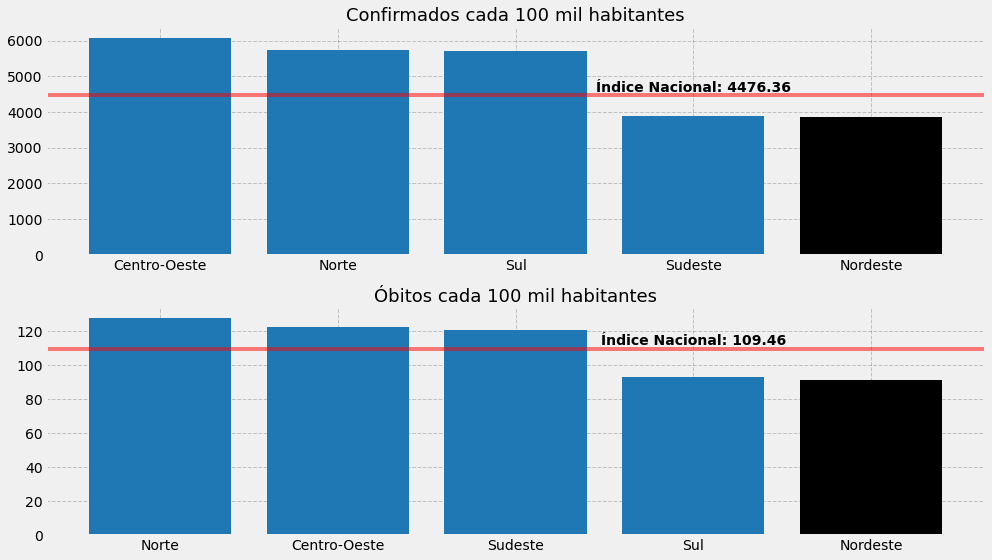

In [88]:
# antes vamos calcular os números nacionais para compararmos cada região
regioes_conf_por_100k = round((regioes['confirmed'].sum())/(regioes['estimated_population'].sum()/100000),2)
regioes_obitos_por_100k = round((regioes['deaths'].sum())/(regioes['estimated_population'].sum()/100000),2)
regioes_deathrate_total = round((regioes['deaths'].sum())/(regioes['confirmed'].sum()),2)*100


# dispondo as regiões do forma decrescente por ordem de confirmados cada 100 mil
regioes_confirmadopor100k_ordem = regioes.sort_values('confirmed_per_100k', ascending=False)
# dispondo as regiões do forma decrescente por ordem de óbitos cada 100 mil
regioes_obitopor100k_ordem = regioes.sort_values('deaths_per_100k', ascending=False)

# construindo os gráficos
fig, ax = plt.subplots(2, figsize=(14,8), tight_layout=True)

ax[0].bar(regioes_confirmadopor100k_ordem.index, regioes_confirmadopor100k_ordem['confirmed_per_100k'], 
          color=cores_ne_ba(regioes_confirmadopor100k_ordem.index))
ax[0].grid(ls='--', color='k', alpha=0.2)
ax[0].axhline(regioes_conf_por_100k, color='red', alpha=.5)
ax[0].text('Sudeste', 4550, f'Índice Nacional: {round(regioes_conf_por_100k,2)}', fontweight='bold', ha='center')
ax[0].set_title('Confirmados cada 100 mil habitantes', fontsize=18)

ax[1].bar(regioes_obitopor100k_ordem.index, regioes_obitopor100k_ordem['deaths_per_100k'], 
          color=cores_ne_ba(regioes_obitopor100k_ordem.index))
ax[1].grid(ls='--', color='k', alpha=0.2)
ax[1].axhline(regioes_obitos_por_100k, color='red', alpha=.5)
ax[1].text('Sul', 112, f'Índice Nacional: {round(regioes_obitos_por_100k,2)}', fontweight='bold', ha='center')
ax[1].set_title('Óbitos cada 100 mil habitantes', fontsize=18);

>Apesar de em números absolutos a região Nordeste figurar em segundo lugar para casos confirmados e óbitos, a região mostra-se como uma das menos afetadas quando na proporção por 100 mil habitantes. 
<br>

>O contrário é verdadeiro para as regiões Norte e Centro-Oeste, que figuram nas 2 últimas posições respectivamente em números absolutos, mas revelam uma situação preocupante quando considerados casos e óbitos por 100 mil habitantes. 

<br>

**Taxa de Mortalidade**
<br>

Mas, será que no índice de mortalidade esse quadro continua o mesmo? A taxa de mortalidade é calculada dividindo o número de óbitos pelo número de casos confirmados. É um indicador interessante, pois reflete na estrutura de saúde e atendimento de uma região. Ou seja, se mais pessoas morrem pode ser explicado pelo fato de a rede hospitalar da região não estar adequada para atender à demanda.

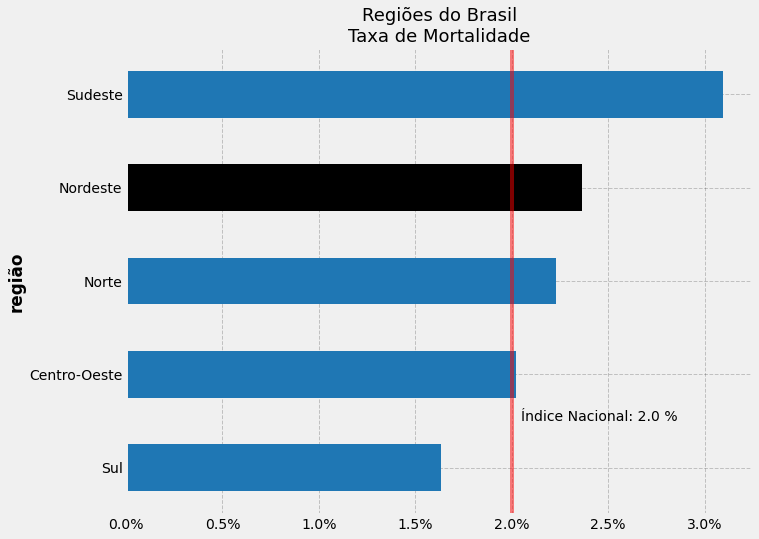

In [97]:
plt.figure(figsize=(10,8))
tx_obito_reg = regioes.sort_values('death_rate')['death_rate']
ax = tx_obito_reg.plot(kind='barh', color=cores_ne_ba(tx_obito_reg.index))
plt.title('Regiões do Brasil\nTaxa de Mortalidade', fontsize=18)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1f}%'))
ax.grid(ls='--', color='k', alpha=0.2)
ax.axvline(regioes_deathrate_total, color='red', alpha=0.5)
ax.text(2.05, 0.5, f'Índice Nacional: {regioes_deathrate_total} %', rotation=0)
plt.ylabel('região', fontweight='bold');

>No gráfico em barras horizontais acima vemos que o Nordeste é a segunda região com maior taxa de mortalidade. Isso pode ser interpretado como a região não está com a estrutura ideal para dar conta do número de casos confirmados. Para ilustrar, a região Sul tem número maior que o Nordeste em casos confirmados por 100 mil. No entanto, apresenta a menor taxa de mortalidade do país, revelando, possivelmente, uma estrutura hospitalar mais equipada.
<br>

>Devido ao fato de ser uma doença ainda sem cura, o atendimento médico-hospitalar imediato nas primeiras fases é a principal arma contra os efeitos da COVID-19 no pacientes, significando a diferença entre a vida e a morte. Sobre o Nordeste  e esse 'pulo' da região no último gráfico, será que toda a região manteve esse comportamento ou teve algum estado que 'puxou' os números para cima? E como a Bahia reagiu à pandemia nesse contexto?

<a id='ne'></a>

### Estados do Nordeste

Dando mais um zoom na nossa análise e agora focando no Nordeste, vamos comparar os estados dessa região sob os mesmos indicadores. (alem disso, vamos levantar algumas hipoteses.

In [98]:
# vamos primeiros agrupar os estados nordestinos num unico dataframe
# depois vamos criar as colunas com os novos indicadores

ne_grupo = ne[ne['is_last']==True].groupby('state').sum()[['confirmed', 'deaths', 'estimated_population']]
ne_grupo['confirmed_per_100k'] = ne_grupo['confirmed']/(ne_grupo['estimated_population']/100000)
ne_grupo['deaths_per_100k'] = ne_grupo['deaths']/(ne_grupo['estimated_population']/100000)
ne_grupo['death_rate'] = (ne_grupo['deaths']/ne_grupo['confirmed'])*100
ne_grupo

confirmed  deaths  estimated_population  confirmed_per_100k  \
state                                                                
AL        120686    2797            3351543.00             3600.91   
BA        598497   10296           14930634.00             4008.52   
CE        379915   10652            9187103.00             4135.31   
MA        210017    4787            7114598.00             2951.92   
PB        199706    4171            4039277.00             4944.10   
PE        273278   10546            9616621.00             2841.73   
PI        163497    3149            3281480.00             4982.42   
RN        133174    3203            3534165.00             3768.19   
SE        140005    2818            2318822.00             6037.76   

       deaths_per_100k  death_rate  
state                               
AL               83.45        2.32  
BA               68.96        1.72  
CE              115.95        2.80  
MA               67.28        2.28  
PB              103.26        2.09  
PE              109.66        3.86  
PI               95.96        1.93  
RN               90.63        2.41  
SE              121.53        2.01

<br>

Como estão os índices do Nordeste em confirmados e óbitos? Para compararmos estados tão diversos tanto em área geográfica como tamanho da população, é necessário fazer essa padronização para cada 100 mil habitantes. Veremos como os números se comportam.

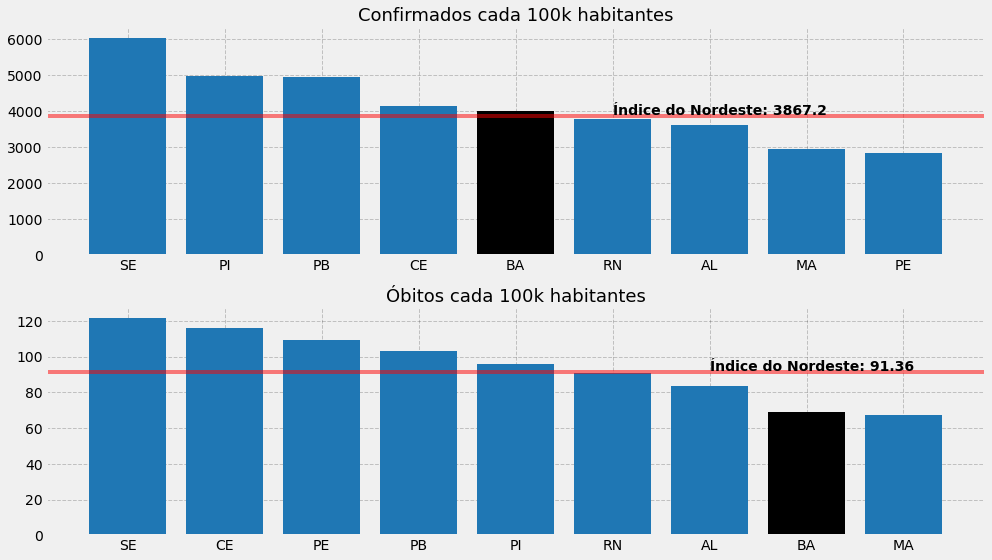

In [101]:
# para efeitos de comparação vamos calcular as taxas para toda a regiao do nordeste
ne_confirmados_100k = (ne_grupo['confirmed'].sum())/(ne_grupo['estimated_population'].sum()/100000)
ne_obitos_taxa_100k = (ne_grupo['deaths'].sum())/(ne_grupo['estimated_population'].sum()/100000)

# dispondo os estados de forma decrescente por ordem de confirmados cada 100 mil
ordem_confirmado_por100k = ne_grupo.sort_values('confirmed_per_100k', ascending=False)
# dispondo os estados do forma decrescente por ordem de óbitos cada 100 mil
ordem_obito_por100k = ne_grupo.sort_values('deaths_per_100k', ascending=False)

fig, ax = plt.subplots(2, figsize=(14,8), tight_layout=True)

d = {'PI':'blue', 'SE':'blue', 'PB':'blue', 'CE':'blue', 'AL':'blue', 'RN':'blue', 'MA':'blue', 'BA':'red', 'PE':'blue'}
ax[0].bar(ordem_confirmado_por100k.index, ordem_confirmado_por100k['confirmed_per_100k'],
         color=cores_ne_ba(ordem_confirmado_por100k.index))
ax[0].axhline(ne_confirmados_100k, color='red', alpha=0.5)
ax[0].text('RN', 3900, f'Índice do Nordeste: {round(ne_confirmados_100k,2)}', fontweight='bold')
ax[0].grid(ls='--', color='k', alpha=0.2)
ax[0].set_title('Confirmados cada 100k habitantes', fontsize=18)

ax[1].bar(ordem_obito_por100k.index, ordem_obito_por100k['deaths_per_100k'], 
          color=cores_ne_ba(ordem_obito_por100k.index))
ax[1].axhline(ne_obitos_taxa_100k, color='red', alpha=0.5)
ax[1].text('AL', 92, f'Índice do Nordeste: {round(ne_obitos_taxa_100k,2)}', fontweight='bold')
ax[1].grid(ls='--', color='k', alpha=0.2)
ax[1].set_title('Óbitos cada 100k habitantes', fontsize=18);


>A Bahia é uma das melhores colocadas na quantidade de óbitos para cada 100 mil habitantes. Até Dezembro de 2020 estava com o índice menor que o regional no quesito "confirmados para cada 100 mil habitantes. No entanto, depois das festas de ano novo o estado teve uma alta no número de casos e ultrapassou levemente o índice regional. E Pernambuco, apesar de mostrar um dos maiores índices de óbitos por 100 mil, aparece em último lugar no número de confirmados por 100 mil. Isso pode se dever a uma subnotificação do estado na identificação de novos casos confirmados. Será que o mesmo se repete no índice de mortalidade?

In [102]:
# calculando a taxa de mortalidade de toda a região
# este número será nosso parâmetro de comparação entre os estados
ne_taxa_mortalidade = round((ne_grupo['deaths'].sum()/ne_grupo['confirmed'].sum())*100, 2)

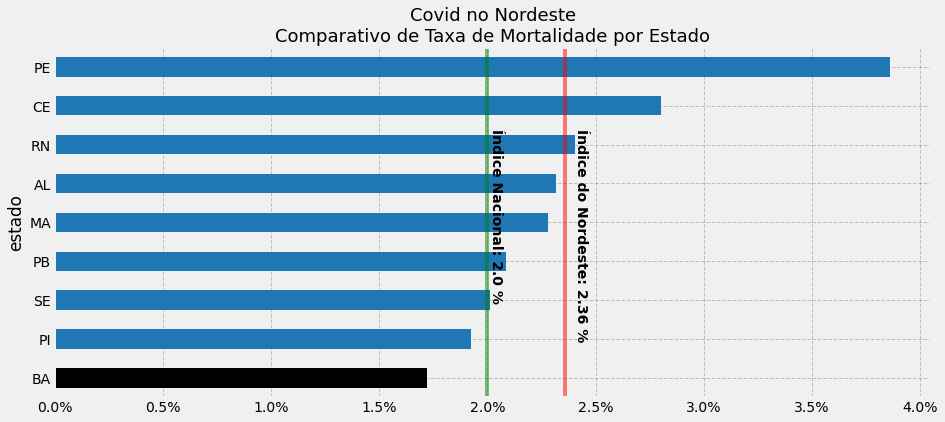

In [108]:
# agora vamos comparar a taxa de mortalidade por estado
tx_obito_ne = ne_grupo.sort_values('death_rate')['death_rate']
ax = tx_obito_ne.plot(kind='barh', figsize=(14,6), color=cores_ne_ba(tx_obito_ne.index))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1f}%'))
ax.axvline(regioes_deathrate_total, color='green', alpha=0.5)
ax.text(2.01, 2, f'Índice Nacional: {regioes_deathrate_total} %', rotation=-90, fontweight='bold')
ax.axvline(ne_taxa_mortalidade, color='red', alpha=0.5)
ax.text(2.40, 1, f'Índice do Nordeste: {ne_taxa_mortalidade} %', rotation=-90, fontweight='bold')
plt.title('Covid no Nordeste\nComparativo de Taxa de Mortalidade por Estado', fontsize=18)
plt.ylabel('estado')
plt.grid(ls='--', color='k', alpha=0.2)
plt.xticks(rotation=0);

>Vemos aqui que dois estados, Pernambuco e Ceará, se destacam negativamente apresentando índices alarmantes de mortalidade, inclusive maiores que as taxas nacionais. Estes mesmos estados também estiveram acima do índice regional em óbitos por 100 mil habitantes. Outros estados também repetem o padrão dos gráficos anteriores sobre o Nordeste e figuram altas taxas de mortalidade, como no caso de Rio Grande do Norte, Alagoas e Maranhão.

>A Bahia novamente é o estado menos atingido, apresentando a menor taxa de mortalidade da região no período até a primeira quinzena de Fevereiro de 2021. Portanto, respondendo à pergunta do início desta seção, a Bahia tem pouca "participação" no salto da região Nordeste na taxa de mortalidade. Pernambuco, Ceará e Rio Grande do Norte foram os que mais influenciaram o segundo lugar da região Nordeste em taxa de mortalidade.

Agora vamos dar mais um zoom na nossa análise e comparar a Bahia com dois dos estados mais afetados, Pernambuco e Ceará. Vamos tentar elucidar as seguintes questões:

- Esses três estados mantiveram a mesma média durante todo o período, desde o início da pandemia?
- Qual a tendência daqui para frente?

In [109]:
# vamos calcular o número de novos casos diários de confirmados e óbitos
# vamos agrupar cada estado por data e depois tirar a diferença de cada dia em relação ao dia anterior
novos_casos_ba = cidades_ba.groupby('date').sum().diff()[['confirmed', 'deaths']]
novos_casos_ce = cidades_ce.groupby('date').sum().diff()[['confirmed', 'deaths']]
novos_casos_pe = cidades_pe.groupby('date').sum().diff()[['confirmed', 'deaths']]

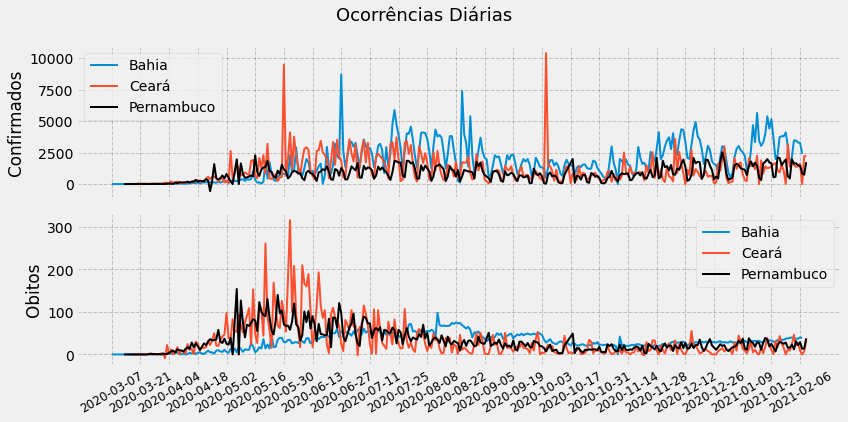

In [168]:
# criando o grafico usando programação orientada a objetos

fig, ax = plt.subplots(2, figsize=(12,6), tight_layout=True, sharex=True)

ax[0].plot(novos_casos_ba['confirmed'].index, novos_casos_ba['confirmed'].values, label='Bahia', linewidth=2.0)
ax[0].plot(novos_casos_ce['confirmed'].index, novos_casos_ce['confirmed'].values, label='Ceará', linewidth=2.0)
ax[0].plot(novos_casos_pe['confirmed'].index, novos_casos_pe['confirmed'].values, 
           label='Pernambuco', color='black', linewidth=2.0)
ax[0].set_ylabel('Confirmados')
ax[0].grid(ls='--', color='k', alpha=0.2)
ax[0].legend(loc='best')


ax[1].plot(novos_casos_ba['deaths'].index, novos_casos_ba['deaths'].values, label='Bahia', linewidth=2.0)
ax[1].plot(novos_casos_ce['deaths'].index, novos_casos_ce['deaths'].values, label='Ceará', linewidth=2.0)
ax[1].plot(novos_casos_pe['deaths'].index, novos_casos_pe['deaths'].values, 
           label='Pernambuco', color='black', linewidth=2.0)
ax[1].xaxis.set_major_locator(ticker.IndexLocator(base=14, offset=0))
ax[1].set_ylabel('Obitos')
ax[1].grid(ls='--', color='k', alpha=0.2)
ax[1].legend(loc='best')

plt.xticks(rotation=30, fontsize=12)
plt.suptitle('Ocorrências Diárias', fontsize=18);

>Podemos ver que o Ceará foi o estado mais afetado nessa pandemia chegando no inicio de outubro a picos de mais de 10.000 casos confirmados num único dia! Além disso, o estado amargou mais de 300 óbitos diários no final do mês de maio. Para efeitos de comparação, o recorde de mortes diárias na Bahia foi em meados de agosto, com 100 ocorrências. 

>Pernambuco manteve-se numa situação intermediária, chegando a registrar por volta de 150 óbitos diários no início de maio. Sobre os poucos casos confirmados do estado no gráfico superior, podemos inferir uma subnotificação devido ao contraste com o alto número de óbitos diários.

>No gráfico de novos casos confirmados, o final da linha na semana de 12-12-2020 indicou uma subida acentuada para os 3 estados, mas mais acentuada na Bahia, marcando possivelmente o início da segunda onda que vivemos no momento. O que deve ter causado essa subida? Será que teve alguma subregião específica da Bahia que alavancou esses números? Vamos agora dar nosso último zoom e focar na Bahia e suas subdivisões.

<a id='bahia'></a>

### Situação da Bahia

Antes de patirmos para as regiões imediatas, vamos ver a situação do estado como um todo.

Quais foram os momentos de maior pico nesta pandemia? Qual o período mais grave com maior numero de confirmados e óbitos? Alguns jornais veicularam que o inverno poderia piorar a situação devido ao já comum agravamento de problemas respiratórios típicos da estação. Pode-se constatar isso durante o inverno na Bahia? Caso positivo, o pior já passou com a aproximação do verão ou realmente existe uma segunda onda vindo ai?

Para analisar a situação do estado vejamos a média móvel semanal para casos confirmados e óbitos.

In [125]:
# vamos agrupar por data para facilitar nossos cálculos
cidades_ba_group = cidades_ba.groupby('date').sum()

# excluindo colunas desnecessárias
cidades_ba_group.drop(['order_for_place', 'is_last', 'estimated_population',
                      'city_ibge_code'], axis=1, inplace=True)

# criando colunas com novas mortes e novos óbitos por dia
# vamos usar o método diff() para tirar a diferença entre cada linha e a respectiva anterior
cidades_ba_group['new_confirmed'] = cidades_ba_group['confirmed'].diff()
cidades_ba_group['new_deaths'] = cidades_ba_group['deaths'].diff()

# criando a coluna de media movel para casos confirmados e mortes
# usaremos o método rolling() para que agregue uma janela de cada 7 dias e aplique a media para cada janela
cidades_ba_group['mv_confirmed'] = cidades_ba_group['new_confirmed'].rolling(7).mean()
cidades_ba_group['mv_deaths'] = cidades_ba_group['new_deaths'].rolling(7).mean()

# verificando primeiras 10 linhas
cidades_ba_group.head(10)

confirmed  deaths  confirmed_per_100k_inhabitants  death_rate  \
date                                                                        
2020-03-06          1       0                            0.16        0.00   
2020-03-07          2       0                            0.32        0.00   
2020-03-09          2       0                            0.32        0.00   
2020-03-10          2       0                            0.32        0.00   
2020-03-11          3       0                            0.48        0.00   
2020-03-12          3       0                            0.48        0.00   
2020-03-13          7       0                            0.75        0.00   
2020-03-15          9       0                            0.95        0.00   
2020-03-16         10       0                            1.61        0.00   
2020-03-17         14       0                            6.52        0.00   

            new_confirmed  new_deaths  mv_confirmed  mv_deaths  
date                                                            
2020-03-06            nan         nan           nan        nan  
2020-03-07           1.00        0.00           nan        nan  
2020-03-09           0.00        0.00           nan        nan  
2020-03-10           0.00        0.00           nan        nan  
2020-03-11           1.00        0.00           nan        nan  
2020-03-12           0.00        0.00           nan        nan  
2020-03-13           4.00        0.00           nan        nan  
2020-03-15           2.00        0.00          1.14       0.00  
2020-03-16           1.00        0.00          1.14       0.00  
2020-03-17           4.00        0.00          1.71       0.00

<br>

Abaixo vamos plotar as médias móveis para casos confirmados e óbitos desde o início da pandemia.

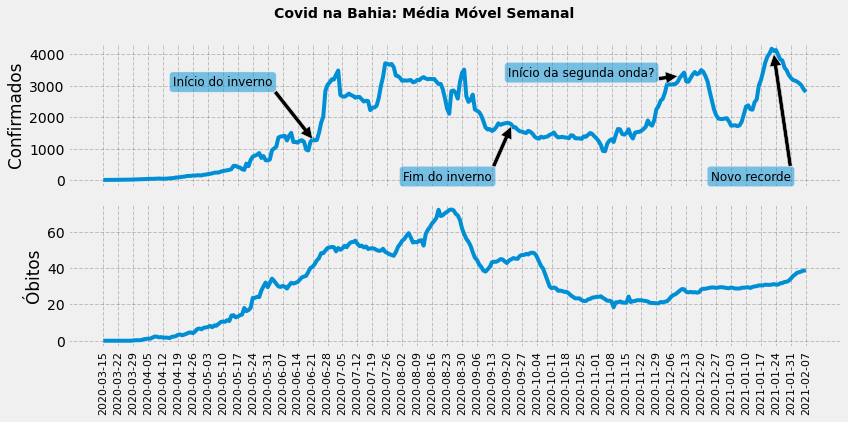

In [142]:
fig, ax = plt.subplots(2,figsize=(12,6), tight_layout=True, sharex=True)

ax[0].plot(cidades_ba_group['mv_confirmed'].index, cidades_ba_group['mv_confirmed'].values)
ax[0].xaxis.set_major_locator(ticker.IndexLocator(base=7, offset=0))
#ax[0].axvline('2020-11-29', color='red', alpha=0.4)
#ax[0].axvline('2020-12-06', color='red', alpha=0.4)

ax[0].annotate('Início do inverno', xy=('2020-06-21', 1300), xytext=('2020-05-10', 3000), 
               arrowprops=dict(facecolor='black', shrink=1), ha='center', bbox=dict(boxstyle="round", alpha=0.5), size=12)
ax[0].annotate('Fim do inverno', xy=('2020-09-22', 1700), xytext=('2020-09-13', 0), 
               arrowprops=dict(facecolor='black', shrink=1), ha='right', bbox=dict(boxstyle="round", alpha=0.5), size=12)

ax[0].annotate('Início da segunda onda?', xy=('2020-12-09', 3300), xytext=('2020-10-25', 3300), 
               arrowprops=dict(facecolor='black', shrink=2), ha='center', bbox=dict(boxstyle="round", alpha=0.5), size=12)
ax[0].annotate('Novo recorde', xy=('2021-01-23', 4000), xytext=('2021-01-31', 0), 
               arrowprops=dict(facecolor='black', shrink=1), ha='right', bbox=dict(boxstyle="round", alpha=0.5), size=12)

ax[0].set_ylabel('Confirmados')
ax[0].grid(ls='--', color='k', alpha=0.2)

ax[1].plot(cidades_ba_group['mv_deaths'].index, cidades_ba_group['mv_deaths'].values)
ax[1].xaxis.set_major_locator(ticker.IndexLocator(base=7, offset=0))
ax[1].grid(ls='--', color='k', alpha=0.2)
ax[1].set_ylabel('Óbitos')

plt.xticks(rotation=90, fontsize=11)
plt.suptitle('Covid na Bahia: Média Móvel Semanal', fontsize=14, fontweight='bold');

>Os dois gráficos de média móvel são bastante semelhantes no comportamento de acentuação da crise. Percebe-se um agravamento das notificações a partir da semana de 21 de junho com um abrandamento dos casos confirmados a partir de 20 de setembro. Alguns dias depois, a partir da semana de 04 de outubro, começa a se destacar uma queda para a média de óbitos.

>Coincidentemente o período de maior crise se deu justamente no inverno no hemisfério sul, que vai de 21 de junho a 22 de setembro. Pode ser devido ao inverno, mas também calhou de a estação ocorrer justamente no meio da pandemia. Mas, a partir de 22 de novembro a média móvel de casos confirmados voltar a subir vertiginosamente, para níveis parecidos aos de pico da pandemia. Essa possível segunda onda pode ser explicada pelas aglomerações durante as eleições e as saidinhas nos feriadões.

>Respondendo à pergunta do início desta seção, o pior já pode ter passado, mas, se medidas de isolamento social não forem retomadas, a crise pode se agravar novamente neste verão. Outra conclusão é que o inverno não é fator determinante para agravamento da crise. Quanto mais nos aproximávamos do verão, com início em 21 de Dezembro, maior foi a subida da curva para níveis de início da pandemia. As ações mais eficientes seriam as medidas dos governos para prevenção da pandemia com isolamento social, o que não ocorreu e estamos no momento experimentando novos recordes de casos confirmados.

>Como podemos avaliar cada subdivisão da Bahia neste contexto?

<br>

### Regiões Intermediárias e Imediatas da Bahia

In [143]:
# vamos criar um dicionario com o nome das cidades-sede como chave e cidades da região como valores

micro_regioes = {'Barreiras':tuple(barreiras), 'Cotegipe':tuple(cotegipe), 'Sta Maria da Vitoria':tuple(sta_maria_vit),
                'Juazeiro':tuple(juazeiro), 'Paulo Afonso':tuple(paulo_afonso), 'Barra':tuple(barra), 
                 'B. Jesus da Lapa':tuple(bom_jesus_lapa), 'Senhor do Bonfim':tuple(senhor_bonfim), 
                 'Irece':tuple(irece), 'Jacobina':tuple(jacobina), 'Itaberaba':tuple(itaberada),
                 'Feira de Santana':tuple(feira_santana), 'Jeremoabo':tuple(jeremoabo), 
                 'Euclides da Cunha':tuple(euclides_cunha),'Ribeira do Pombal':tuple(rib_pombal), 
                 'Serrinha':tuple(serrinha), 'Alagoinhas':tuple(alagoinhas), 'Entre Rios':tuple(entre_rios),
                'Catu':tuple(catu), 'Sto Ant de Jesus':tuple(sto_antonio), 'Salvador':tuple(salvador), 
                 'Boquira':tuple(boquira), 'Seabra':tuple(seabra), 'Jequie':tuple(jequie), 
                 'Livramento do Brumado':tuple(liv_brumado), 'Guanambi':tuple(guanambi), 'Brumado':tuple(brumado), 
                'Vit da Conquista':tuple(vit_conquista), 'Itapetinga':tuple(itapetinga), 'Valenca':tuple(valenca), 
                 'Porto Seguro':tuple(porto_seguro),
                'Ilheus-Itabuna':tuple(ios_itabuna)}

# agora vamos criar um dicionário onde cada chave é uma cidade e seus valores são seus respectivos polos regionais

cidades_micro_regioes = {}
for cidade in cidades_ba['city'].unique():
    for sede in micro_regioes.keys():
        if cidade in micro_regioes[sede]:
            cidades_micro_regioes[cidade] = sede
        else:
            x = 'NA'
            
# criando a nova coluna para indicar na tabela a qual subdivisão cada cidade pertence

cidades_ba['micro_region'] = cidades_ba['city'].map(cidades_micro_regioes)

In [144]:
# verificando se alguma cidade ficou sem denominação de região intermediária
cidades_ba[cidades_ba['micro_region'].isna()]['city'].unique()

array([], dtype=object)

In [145]:
# vamos ver como ficou nossa nova coluna
cidades_ba[['city', 'micro_region']].sample(5)

city      micro_region
331709                Irará  Feira de Santana
342366            Jaguaripe  Sto Ant de Jesus
387418  São José do Jacuípe          Jacobina
287381             Alcobaça      Porto Seguro
381381               Seabra            Seabra

In [146]:
# vamos criar o novo dataframe focando nos números de cada região
# usaremos o dataframe cidades_ba como base

micro_reg = cidades_ba[cidades_ba['is_last']==True].groupby('micro_region').sum()
micro_reg['death_rate'] = (micro_reg['deaths'] / micro_reg['confirmed'])*100
micro_reg['confirmed_per_100k_inhabitants'] = micro_reg['confirmed']/(micro_reg['estimated_population']/100000)
micro_reg

confirmed  deaths  order_for_place  is_last  \
micro_region                                                         
Alagoinhas                 11358     179             2504        9   
B. Jesus da Lapa            2855      39             1530        6   
Barra                       3957      72             1945        7   
Barreiras                  16519     198             1902        7   
Boquira                     2621      31             2726       11   
Brumado                     9435      91             3714       14   
Catu                        9233     130             2014        7   
Cotegipe                    2929      44             1950        8   
Entre Rios                  2506      34             1371        5   
Euclides da Cunha           6655      95             2464        9   
Feira de Santana           40375     637             6735       24   
Guanambi                    8117      72             4529       18   
Ilheus-Itabuna             63792    1265            12017       41   
Irece                      17200     168             4836       19   
Itaberaba                   8658     113             3059       12   
Itapetinga                  9264     143             2487        9   
Jacobina                   14726     105             4295       16   
Jequie                     23764     362             6923       26   
Jeremoabo                   1873      31             1267        5   
Juazeiro                   13939     248             2266        8   
Livramento do Brumado       2306      32             1410        5   
Paulo Afonso                3673      82             1569        6   
Porto Seguro               38711     636             5352       19   
Ribeira do Pombal           8205      91             3750       14   
Salvador                  166873    4084             3099       10   
Seabra                      8638      67             4659       18   
Senhor do Bonfim           10689     135             2396        9   
Serrinha                   21118     134             4887       18   
Sta Maria da Vitoria        4421      62             2187        9   
Sto Ant de Jesus           23579     258             5748       21   
Valenca                    11488     209             2834       10   
Vit da Conquista           29020     449             4540       17   

                       estimated_population  city_ibge_code  \
micro_region                                                  
Alagoinhas                        328745.00     26187185.00   
B. Jesus da Lapa                  181009.00     17506399.00   
Barra                             183168.00     20413477.00   
Barreiras                         347122.00     20398862.00   
Boquira                           194269.00     32057091.00   
Brumado                           226484.00     40840364.00   
Catu                              231007.00     20431942.00   
Cotegipe                          119183.00     23338139.00   
Entre Rios                        125586.00     14554619.00   
Euclides da Cunha                 302905.00     26284111.00   
Feira de Santana                 1074399.00     70042842.00   
Guanambi                          395405.00     52526825.00   
Ilheus-Itabuna                    983168.00    119556617.00   
Irece                             396256.00     55388467.00   
Itaberaba                         254407.00     35018012.00   
Itapetinga                        197600.00     26268291.00   
Jacobina                          338733.00     46754682.00   
Jequie                            513575.00     75845440.00   
Jeremoabo                          96814.00     14609887.00   
Juazeiro                          494980.00     23352806.00   
Livramento do Brumado             102220.00     14580625.00   
Paulo Afonso                      182526.00     17490326.00   
Porto Seguro                      806790.00     55451194.00   
Ribeira do Pombal                 334859.00     40805406.00   
Salv

>Todas as regiões imediatas da Bahia foram incluídas com sucesso

Vamos analisar como estão os índices de cada subdivisão, a começar pelo total de confirmados para cada 100 mil habitantes.

In [147]:
# criando uma tabela que considere somente os últimos boletins para obtermos números atualizados de cada cidade
cidades_ba_ultimo = cidades_ba[cidades_ba['is_last']==True]

# calculando o índice da Bahia de confirmados para cada 100 mil habitantes
# usaremos este número para plotar no gráfico e servir como benchmark para comparação entre as regiões
bahia_confirmados_100k = cidades_ba_ultimo['confirmed'].sum()/(cidades_ba_ultimo['estimated_population'].sum()/100000)

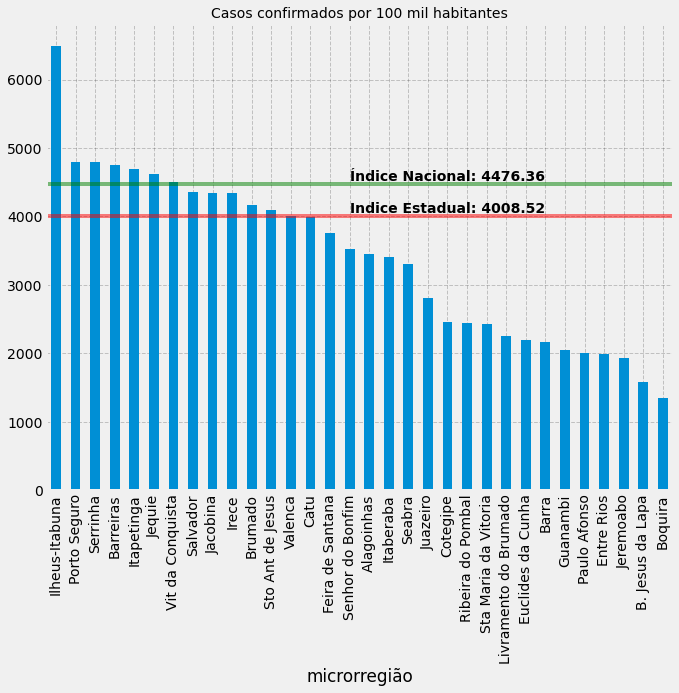

In [149]:
# plotando no gráfico de barras de forma ordenada
ax = micro_reg['confirmed_per_100k_inhabitants'].sort_values(ascending=False).plot(kind='bar', figsize=(10,8))
# inserindo o benchmark para comparação
ax.axhline(bahia_confirmados_100k, alpha=0.5, color='red')
ax.axhline(regioes_conf_por_100k, alpha=0.5, color='green')
ax.text(20, 4060, f'Indice Estadual: {bahia_confirmados_100k.round(2)}', fontweight='bold', ha='center')
ax.text(20, 4530, f'Índice Nacional: {round(regioes_conf_por_100k,2)}', fontweight='bold', ha='center')
ax.grid(ls='--')
ax.set_xlabel('microrregião')
ax.grid(ls='--', color='k', alpha=0.2)
ax.set_title('Casos confirmados por 100 mil habitantes', fontsize=14);

>Vemos claramente que existem algumas regiões puxando os índices estaduais para cima. São 12 regiões no total com números superiores aos do estado e 6 dessas em situação gravíssima, muito acima do índice nacional. Destaque negativo para as regiões de Ilhéus-Itabuna, Porto Seguro e Barreiras, ultrapassando a marca dos 6.000 e 4.500 casos respectivamente para cada 100.000 habitantes. São números que passam muito do nacional, que tem 4.476 casos. Ilhéus e Porto Seguro abrigam os dois aeroportos principais para acesso à região sul da Bahia, de praias famosas, atraindo um grande fluxo de pessoas de todo lugar do mundo. Já a região de Barreiras se destaca por um outro tipo de turismo, o de negócios. A região é um pólo da agricultura estadual e nacional, com destaque para soja e algodão. Além disso, fica num entroncamento de três rodovias federais e próxima à divisa de dois estados, Goiás e Tocantins. Ou seja, a cidade tem forte fluxo de negócios e pessoas de todo o país.

>Será que essas mesmas regiões continuam apresentando números precoupantes para a taxa de mortalidade? Veremos no gráfico a seguir

In [150]:
# calculando a taxa de mortalidade estadual para criar o benchmark
bahia_death_rate = round((cidades_ba_ultimo['deaths'].sum()/cidades_ba_ultimo['confirmed'].sum())*100, 2)

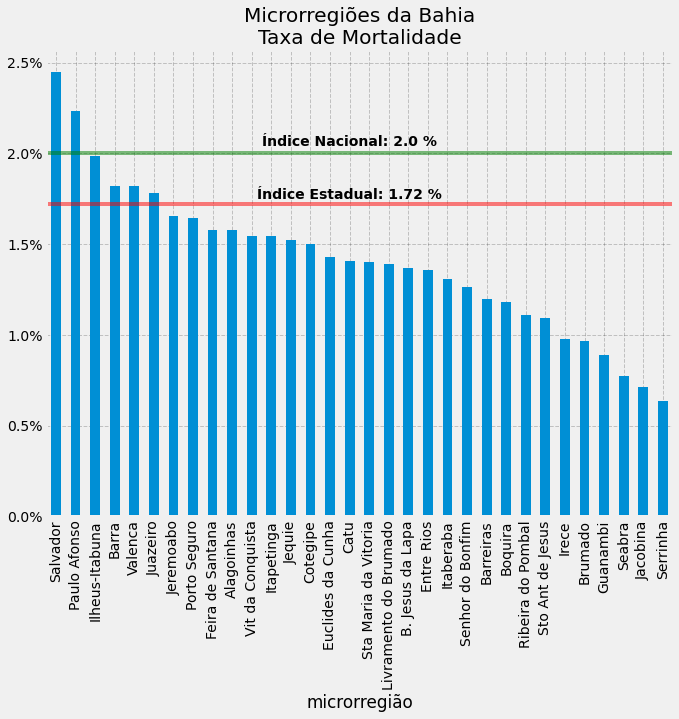

In [158]:
ax = (micro_reg['death_rate']).sort_values(ascending=False).plot(kind='bar', figsize=(10,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}%'))
ax.axhline(regioes_deathrate_total, color='green', alpha=0.5)
ax.text(15, 2.04, f'Índice Nacional: {regioes_deathrate_total} %', fontweight='bold', ha='center')
ax.axhline(bahia_death_rate, color='red', alpha=0.5)
ax.text(15, 1.75, f'Índice Estadual: {bahia_death_rate} %', fontweight='bold', ha='center')
ax.set_title('Microrregiões da Bahia\nTaxa de Mortalidade')
ax.set_xlabel('microrregião')
ax.grid(ls='--', color='k', alpha=0.2);

>De início já notamos logo o alto índice da região de Paulo Afonso. A região supera inclusive o índice nacional de 2%. Em contraste com o número de confirmados para cada 100.000 habitantes, que esta região mostrou baixo, podemos supor que está havendo uma subnotificação.

>Será que o fator turismo e respectivo fluxo de pessoas poderiam de fato explicar a grande incidência em algumas regiões da Bahia? Observar como a pandemia iniciou e se espalhou pela Bahia poderia nos fornecer pistas sobre essa pergunta. Seria interessante fazermos essa análise através do mapa da Bahia. São 32 subdivisões e um mapa é o melhor modelo de plotagem para visualizarmos e nos ajudar em conclusões.

### Visualizando com mapa e linha do tempo...

In [159]:
# usaremos o folium para plotar um mapa coroplético 
# vamos utilizar esse arquivo geojson de todas as cidades da Bahia
# esses arquivos trazem informações das divisas de cada cidade
bahia = 'https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-29-mun.json'
bahia_geo = pd.read_json(bahia)

In [160]:
# vamos substituir o nome de algumas cidades para que fique idêntico aos nomes no arquivo geojson
# sem essa padronização, as cidades com grafias diferentes não seriam encontradas e plotadas
cidades_ba_ultimo['city'].replace({'Iuiu':'Iuiú', 'Muquém do São Francisco':'Muquém de São Francisco', 'Araçás':'Araças'}, inplace=True)

# criando algumas colunas para nos ajudar nas análises
cidades_ba_ultimo['confirmados_na_reg'] = cidades_ba_ultimo.groupby('micro_region')['confirmed', 'estimated_population'].transform('sum')['confirmed']
cidades_ba_ultimo['pop_da_reg'] = cidades_ba_ultimo.groupby('micro_region')['confirmed', 'estimated_population'].transform('sum')['estimated_population']
cidades_ba_ultimo['mortes_na_reg'] = cidades_ba_ultimo.groupby('micro_region')['deaths'].transform('sum')
cidades_ba_ultimo['confirmados_por_100_reg'] = cidades_ba_ultimo['confirmados_na_reg']/(cidades_ba_ultimo['pop_da_reg']/100000)
cidades_ba_ultimo['mortes_taxa_reg'] = (cidades_ba_ultimo['mortes_na_reg']/cidades_ba_ultimo['confirmados_na_reg'])*100

<br>

#### Evolução da pandemia na Bahia. Como a COVID iniciou e se espalhou pelo estado?

Pretendemos plotar um mapa que mostre a evolução da COVID-19 no estado da Bahia. Conforme as datas avançam na linha do tempo, o mapa vai plotando os pontos em cada cidade de acordo com a confirmação dos casos.

In [161]:
# vamos criar uma função para construirmos o dicionário 'feature', que vai trazer as informações para plotarmos no mapa
# este dicionario tra informações como tempo e respectivas coordenadas, formato de ícone e cor

def create_geojson_features(df1, df2):
    features = []
    
    for indice, linha in df1.iterrows():
        for i, row in df2.iterrows():
            if linha['city'] == row['features']['properties']['name']:
                feature = {'type': 'Feature', 'geometry': {'type':'MultiPoint',
                                                           'coordinates':row['features']['geometry']['coordinates'][0]
                }, 'properties': {'time': linha['date'].__str__(), 'style': {'color' : ''}, 'icon': 'circle',
                                  'iconstyle':{'fillColor': 'red', 'fillOpacity': 0.8, 'stroke': 'true',
                                               'radius': 5}}}
                features.append(feature)
    return features

In [162]:
# vamos selecionar algumas colunas do dataset para facilitar nosso trabalho
selecionado = cidades_ba.sort_values('date')[['date', 'city', 'confirmed']]

# selecionando apenas cidades que confirmaram pelo menos 1 caso de COVID
selecionado = selecionado[selecionado['confirmed']>0]

# finalmente vamos capturar somente a primeira ocorrencia de cada cidade
selecionado = selecionado.drop_duplicates('city')

In [163]:
feature_geojson = create_geojson_features(selecionado, bahia_geo)

In [164]:

mapa = folium.Map(location=[-12.5797, -41.7007], zoom_start=6, tiles='cartodbpositron', zoom_control=False)

TimestampedGeoJson(feature_geojson,
                  period = 'P1D',
                  duration = 'P6M',
                  transition_time = 200,
                  auto_play = False).add_to(mapa)

mapa

<br>

>Analisando em conjunto os dois gráficos anterioes (confirmados por 100 mil e taxa de óbitos) mais o mapa acima, podemos afimar que as regiões de Ilhéus-Itabuna, Porto Seguro, e Salvador são as mais afetadas da Bahia. Uma das explicações para isso pode ser pelo fato de estas regiões serem as mais turísticas do estado, onde estão os 3 principais aeroportos do estado. Inclusive, o primeiro caso registrado em Ilhéus-Itabuna foi na cidade turística de Itacaré, em convidados de um casamento com pessoas oriundas de outros estados e países. Este caso de Itacaré acabou contribuindo para difundir o COVID para toda a região sul da Bahia, quando o primeiro caso confirmado de Porto Seguro foi importado através de um convidado contaminado desta festa. Saiba mais sobre os casos neste link: [casamento em itacare](https://noticias.uol.com.br/ultimas-noticias/agencia-estado/2020/03/12/casamento-na-bahia-vira-foco-do-coronavirus.htm) e também neste aqui: [primeiro caso em Porto Seguro](https://www.correio24horas.com.br/noticia/nid/porto-seguro-registra-primeiro-caso-de-coronavirus-bahia-chega-a-10-infectados/) . 

>Através da leitura deste mapa, podemos considerar que nossa hipótese é bem relevane. Para uma conclusão mais assertiva da nossa hipótese, precisaríamos cruzar com outras bases de dados. Mas o fluxo de pessoas devido ao turismo pode ter contribuído para iniciar e difundir o quadro da pandemia no estado. A evolução mostra que a região litorânea da Bahia teve um avanço marcante no começo. As primeiras regiões afetadas são Salvador, Porto Seguro e Ilhéus. E depois ela se dissemina para as cidades que ficam no entorno deste pólos. Se pausamos a linha do tempo do mapa em 30 de março, veremos que no primeiro mês da pandemia a doença se espalhou majoritariamente pela faixa do litoral do estado, com exceção de Barreiras, no extremo oeste. 

>Desde o primeiro caso confirmado, no dia 06 de Março em Feira de Santana, a pandemia levou pouco mais de 5 meses para se espalhar por todas as cidades do estado.

<br>

#### Taxa de mortalidade

Depois da evolução da COVID no estado, vamos analisar a taxa de mortalidade por região. Já vimos este dado em barras, mas mapa é uma forma intuitiva de analisar os dados e, pelo fato de trazer informações adicionais, talvez extrairmos outras informações e conclusões.

O mapa abaixo mostra cada uma das regiões e respectivas taxas de óbito. Conforme o zoom vai se afastando, os marcadores ficam agrupados em clusters. Para saber os índices de cada subdivisão, basta passar o mouse por cima do ponteiro que uma caixa de mensagem vai abrir com a informação.

In [165]:
# plotando o mapa da Bahia
mapa = folium.Map(location=[-12.5797, -41.7007], zoom_start=6, tiles='cartodbpositron')

# o Folium funciona com sobreposição de camadas
# primeiro exibimos o mapa, conforme descrito no comentário do código anterior
# e aqui nós vamos adicionar a camada com as informações que nos interessa
# o plugin folium.Choropleth pede um arquivo geojson indicando as coordenadas de cada cidade
# depois, nos parametro 'data', inserimos o dataframe com as informações da COVID
folium.Choropleth(
    geo_data=bahia,
    data=cidades_ba_ultimo,
    bins=9,
    columns=['city', 'mortes_taxa_reg'],
    key_on='feature.properties.name',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Taxa de Mortalidade',
    highlight=True, tiles='cartodbpositron'
).add_to(mapa)

# este código é responsável por gerar um cluster e agrupar todos os marcadores conforme o zoom diminui
marker_cluster = MarkerCluster().add_to(mapa)



# nos nomes das regiões abreviamos os nomes de algumas cidades
# vamos tratar dessas correcoes com um dicionario e uma função
cidades_corretas = {'B. Jesus da Lapa':'Bom Jesus da Lapa', 'Ilheus-Itabuna':'Ilhéus', 'Irece':'Irecê',
     'Jequie':'Jequié', 'Sta Maria da Vitoria':'Santa Maria da Vitória', 'Sto Ant de Jesus':'Santo Antônio de Jesus',
     'Valenca':'Valença', 'Vit da Conquista':'Vitória da Conquista', 'Livramento do Brumado':'Livramento de Nossa Senhora'}

indice = []
for polo in micro_reg.index.to_list():
    for cid in cidades_corretas.keys():
        if polo == cid:
            polo = cidades_corretas[cid]
        else:
            polo = polo
    indice.append(polo)

# agora vamos criar função para tirar o acento dos nomes das cidades
# o encodamento do folium não reconhece acentos
def sem_acento(cidade):
    if cidade == 'Vitória da Conquista':
        return 'Vitoria da Conquista'
    if cidade == 'Irecê':
        return 'Irece'
    if cidade == 'Ilhéus':
        return 'Ilheus'
    if cidade == 'Santa Maria da Vitória':
        return 'Santa Maria da Vitoria'
    if cidade == 'Valença':
        return 'Valenca'
    if cidade == 'Jequié':
        return 'Jequie'
    if cidade == 'Santo Antônio de Jesus':
        return 'Santo Antonio de Jesus'
    else:
        return cidade 


# vamos criar um laço for para plotar os marcadores no mapa
coord = []
for i in bahia_geo['features']:
    for cidade in indice:
        if [i][0]['properties']['name'] == cidade:
            coord.append(i['geometry']['coordinates'][0][7])
            
            taxa = round(float(cidades_ba_ultimo[cidades_ba_ultimo['city']==cidade]['mortes_taxa_reg']), 2)
            
            folium.Marker(i['geometry']['coordinates'][0][7][::-1], popup=f'''
            <i>Taxa de Mortalidade: {x} </i>
            ''',
            tooltip=f'<strong>Regiao Intermediaria: {sem_acento(cidade)}</strong><br> Taxa de Mortalidade: {taxa}', 
                          charset='utf-8').add_to(marker_cluster)

mapa

<br>

>Percebemos que as regiões mais críticas do estado também são próximas uma da outra. Além de sofrerem com os mais altos números de casos confirmados, as regiões de Ilhéus, Valença e Salvador se destacam negativamente também nas altas taxas de mortalidade. Juntamente com Porto Seguro, essas são as regiões mais turísticas do estado.

>No entanto, no quesito mortalidade, a região imediata de Paulo Afonso amarga índices assustadores de mais de 3%. Esta é uma região que fica fora dos padrões mencionados anteriormente, no litoral e destino turístico, mas um fato que explica a gravidade da doença é o descaso da prefeitura no início da pandemia. A administração local ignorou as recomendações de todas as autoridades sanitárias mundiais e promoveu a festa de São João, em junho. Saiba mais no [link](https://coronavirus.atarde.com.br/mpf-questiona-prefeitura-de-paulo-afonso-sobre-realizacao-de-festejos-juninos-em-plena-pandemia-da-covid-19/).

>Outro fato que chama atenção quando olhamos o mapa é essa grande área mais clara no centro do estado que foi pouco afetada pela pandemia. A taxa de mortalidade reflete os baixos números de casos confirmados, já mostrados em gráficos anteriores. Nesta região que está localizada a Chapada Diamantina. Apesar de ser uma área com um turismo bastante relevante, as medidas da administração local ajudaram frear o avanço da pandemia: até início de novembro era exigido dos turistas o teste de covid para entrar na cidade de Lençóis, que é a principal base para quem vai explorar a região.

<a id='conclusao'></a>

### Conclusões

- Apesar de o número de casos confirmados e óbitos por 100 mil habitantes estar entre os menores do Brasil, a taxa de mortalidade do Nordeste é a segunda maior do país. Isto sugere uma necessidade de maior investimento na rede de assistência hospitalar nesta região.
<br>

- A Bahia é um dos menos afetados tanto no número de confirmados quanto de óbitos para cada 100 mil habitantes. Apesar de ter a maior população da região, os números do estado ficam abaixo do índice regional do Nordeste.
<br>

- Ainda no Nordeste, Pernambuco e Ceará são os 2 estados que mais demandam atenção. Ambos apresentam altas taxas de mortalidade. 
<br>

- O número de casos confirmados de Pernambuco sugere uma subnotificação.
<br>

- Possivelmente existe uma segunda onda vindo aí para os 3 estados analisados do Nordeste: Pernambuco, Ceará e Bahia.
<br>

- O inverno pode ter tido influência na disseminação do vírus, já que a crise se agravou neste período. Mas calhou de o inverno ocorrer justamente no meio da pandemia, portanto não podemos afirmar categoricamente já que correlação não significa causa. Um fato que descarta o argumento de o inverno piorar a crise, é que os dados indicam uma segunda onda acontecendo na primeira quinzena de Dezembro, período de calor e de aproximação do verão.
<br>

- Desde o final de Novembro o número de casos confirmados está voltando a subir para níveis iguais aos de pico da pandemia. O período de eleições, com desrespeito às regras de isolamento social, junto com as saidinhas nos feriadões, pode ter contribuído para agravar a situação e acelerar a vinda de uma segunda onda. Portanto, reforça-se que o melhor "remédio" no momento é o distanciamento social e o respeito à todos os protocolos sanitários como uso de máscaras.
<br>

- Das 32 regiões imediatas da Bahia, foram identificadas 9 que estão puxando os índices do estado para cima. Ou seja, 1/4 das regiões da Bahia é responsável pela maior parte do agravamento da crise. E desse grupo de regiões imediatas, 7 estão muito acima do índice nacional, com destaque negativo para Ilhéus-Itabuna. Uma atenção do governo para essas regiões pode ajudar a diminuir drasticamente os efeitos da pandemia em todo o estado.
<br>

- O fator turismo pode não ser a causa do início e difusão do pandemia na Bahia, mas as regiões mais afetadas do estado são as que recebem maior fluxo de pessoas pelo turismo. Então, de qualquer forma, mesmo não sendo causador, o turismo que não respeita os protocolos sanitários pode ser um vetor de agravamento da situação. Se negligenciada a atenção para esses lugares, será um eterno trabalho de enxugar gelo. O governo do estado deveria focar suas ações preventivas principalmente em 4 dessas regiões turísticas: Porto Seguro, Ilhéus, Valença e Salvador. São as regiões com maiores índices de casos confirmados e óbitos por 100 mil habitantes. O mapa da evolução da COVID no estado nos mostra que desde o início a pandemia irradia a partir destes pólos.
<br>

- Pelo número de casos, é possível que a Bahia já esteja enfrentando uma segunda onda da doença.